## Data Integration & Preprocessing

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import ttest_ind
from sklearn.metrics import root_mean_squared_error  # new import

# Garther Data

In [116]:
# Load data
df = pd.read_excel("draft_with_temperature.xlsx")

# Convert 'y for diagnosed cases' to string type before label encoding
df['y for diagnosed cases'] = df['y for diagnosed cases'].astype(str)

# Encode the column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis_label'] = le.fit_transform(df['y for diagnosed cases'])

# One-hot encode 'Age Category' and 'Region'
df = pd.get_dummies(df, columns=['Age Category', 'Region'], drop_first=True)

# Drop the original label column
df.drop(columns=['y for diagnosed cases'], inplace=True)


# Cleaning data-check from missing values

In [119]:
pd.isnull(df).any() # checking the null in the data

Year                               False
Month                              False
Found dead                         False
Wasting                            False
Respiratory                        False
Other/Unknown                      False
Abnormal faeces or other GIT       False
Non-specific                       False
Nervous                            False
Musculoskeletal/lameness           False
Recumbent                          False
Egg Quality                        False
skin                               False
Avg_Min_Temp                       False
Avg_Max_Temp                       False
diagnosis_label                    False
Age Category_Adult                 False
Age Category_Immature              False
Age Category_unknown/other         False
Region_east of england             False
Region_london                      False
Region_north west                  False
Region_scotland                    False
Region_south east                  False
Region_south wes

In [121]:
# Check the shape and head of final dataset
print("Shape:", df.shape)

Shape: (75, 29)


In [123]:
duplicates = df[df.duplicated()]

# Count duplicate rows
num_duplicates = len(duplicates)

print(f"Number of repeated (duplicate) rows: {num_duplicates}")

Number of repeated (duplicate) rows: 8


In [127]:
# Notes:
# - the `subset=None` means that every column is used 
#    to determine if two rows are different; to change that specify
#    the columns as an array
# - the `inplace=True` means that the data structure is changed and
#   the duplicate rows are gone  
df.drop_duplicates(subset=None, inplace=True)

In [129]:
# Check the shape and head of final dataset
print("Shape:", df.shape)

Shape: (67, 29)


In [131]:
df.head()

,Year,Month,Found dead,Wasting,Respiratory,Other/Unknown,Abnormal faeces or other GIT,Non-specific,Nervous,Musculoskeletal/lameness,...,Region_east of england,Region_london,Region_north west,Region_scotland,Region_south east,Region_south west,Region_wales,Region_west midlands,Region_wet midlands,Region_yorkshire and the humber
0,2012,9,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,2014,1,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,2014,10,0,0,0,1,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
3,2017,10,2,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
4,2017,10,0,1,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 0 to 71
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             67 non-null     int64  
 1   Month                            67 non-null     int64  
 2   Found dead                       67 non-null     int64  
 3   Wasting                          67 non-null     int64  
 4   Respiratory                      67 non-null     int64  
 5   Other/Unknown                    67 non-null     int64  
 6   Abnormal faeces or other GIT     67 non-null     int64  
 7   Non-specific                     67 non-null     int64  
 8   Nervous                          67 non-null     int64  
 9   Musculoskeletal/lameness         67 non-null     int64  
 10  Recumbent                        67 non-null     int64  
 11  Egg Quality                      67 non-null     int64  
 12  skin                         

In [135]:
df.describe()

,Year,Month,Found dead,Wasting,Respiratory,Other/Unknown,Abnormal faeces or other GIT,Non-specific,Nervous,Musculoskeletal/lameness,Recumbent,Egg Quality,skin,Avg_Min_Temp,Avg_Max_Temp,diagnosis_label
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0,67.000000,67.000000,67.000000
mean,2015.701493,5.940299,0.298507,0.179104,0.238806,0.089552,0.074627,0.074627,0.029851,0.014925,0.029851,0.014925,0.0,1.728127,3.566652,11.089552
std,4.722656,3.609250,0.522666,0.386334,0.429572,0.287694,0.264772,0.264772,0.171460,0.122169,0.171460,0.122169,0.0,3.349564,5.425132,7.583338
min,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-0.148810,0.000000,0.000000
25%,2012.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,5.000000
50%,2013.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,10.000000
75%,2021.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.165689,6.303571,16.500000
max,2025.000000,12.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,12.427419,18.266129,28.000000


# Exploratory Data Analysis (EDA)

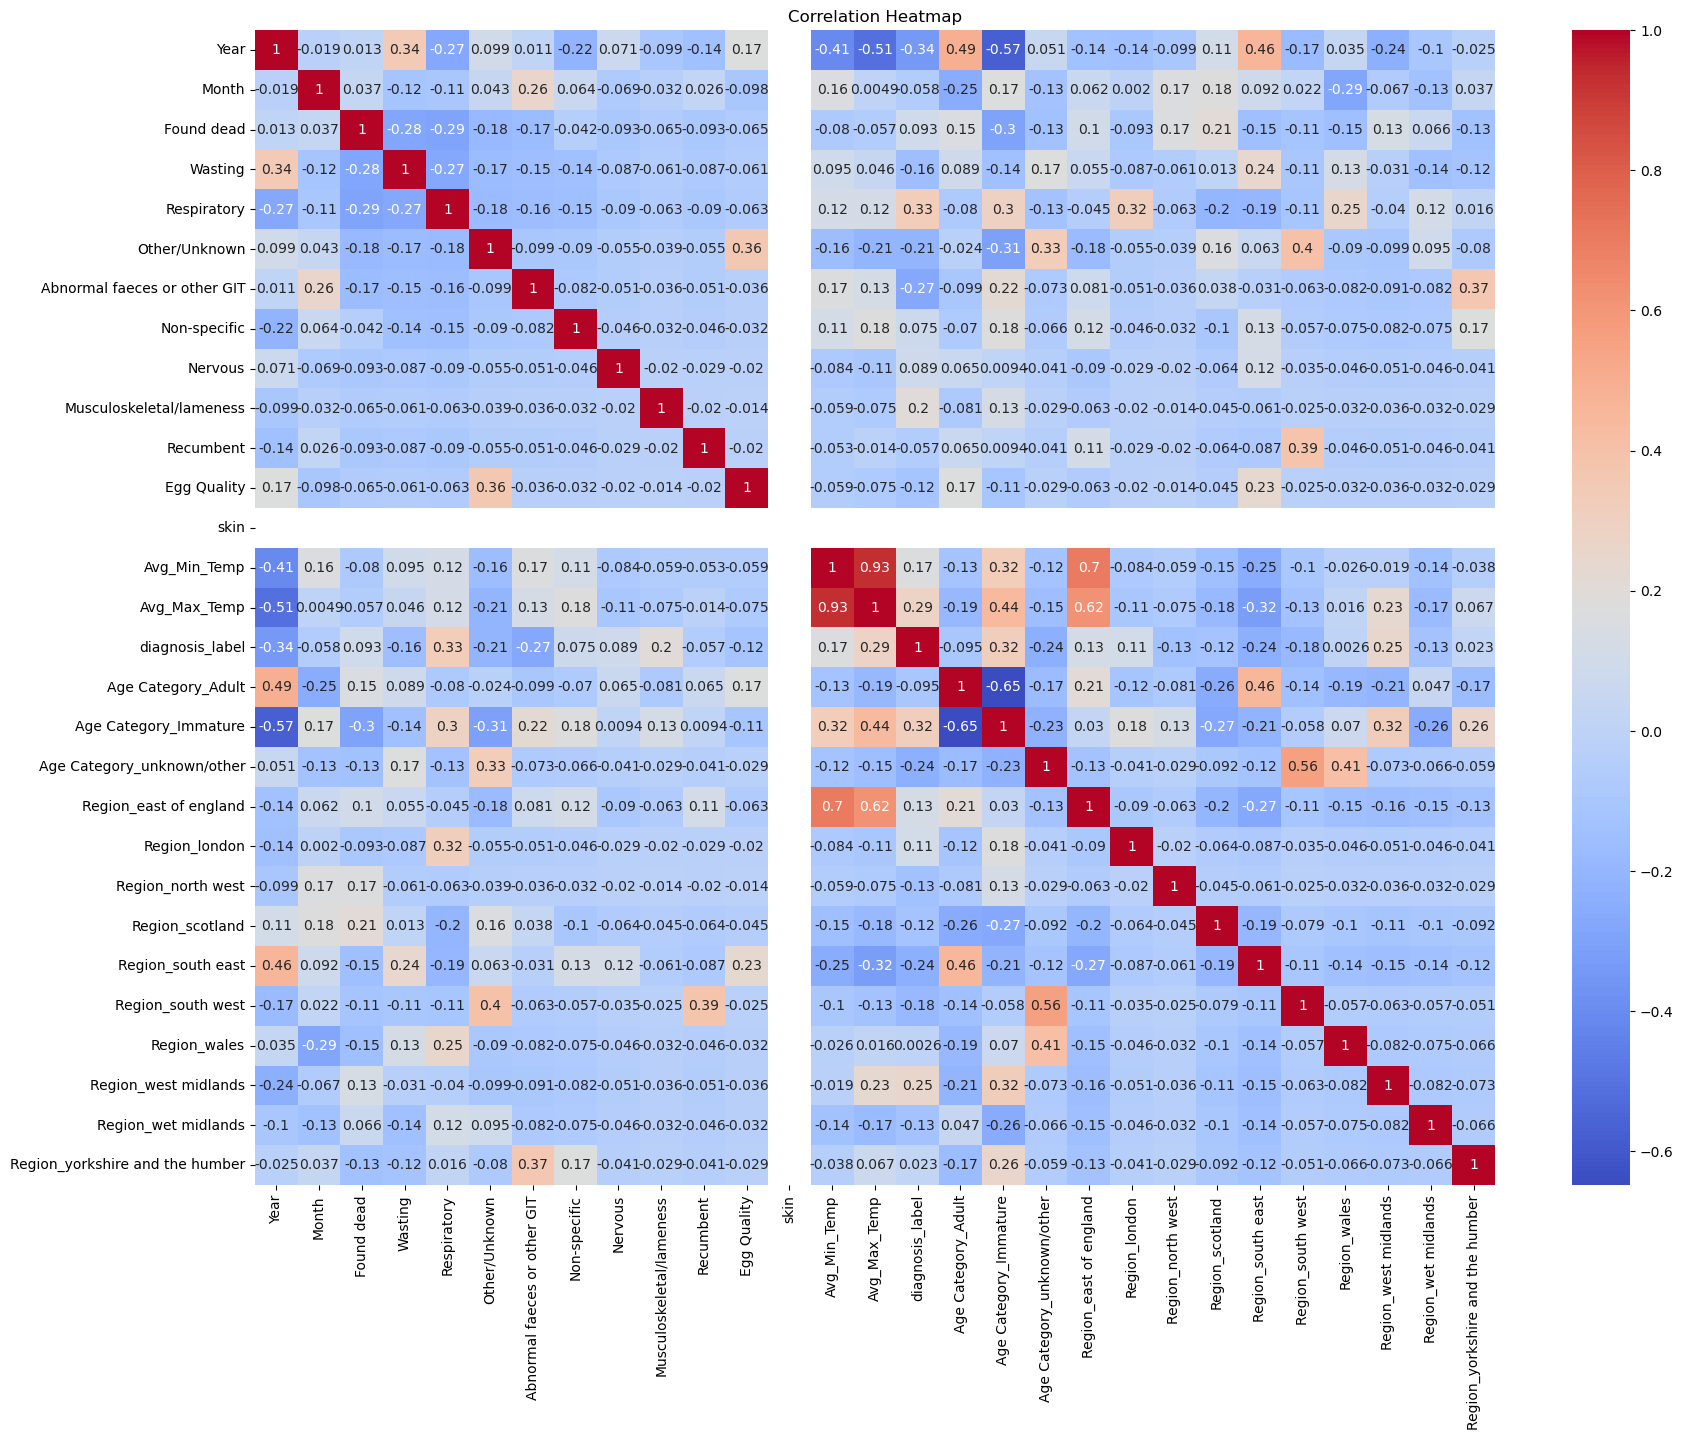

In [34]:
# Correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


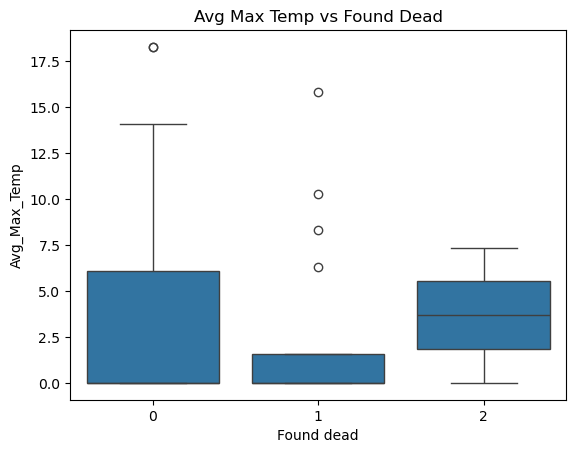

In [35]:
# Boxplot: Temperature vs Found Dead
sns.boxplot(x='Found dead', y='Avg_Max_Temp', data=df)
plt.title("Avg Max Temp vs Found Dead")
plt.show()

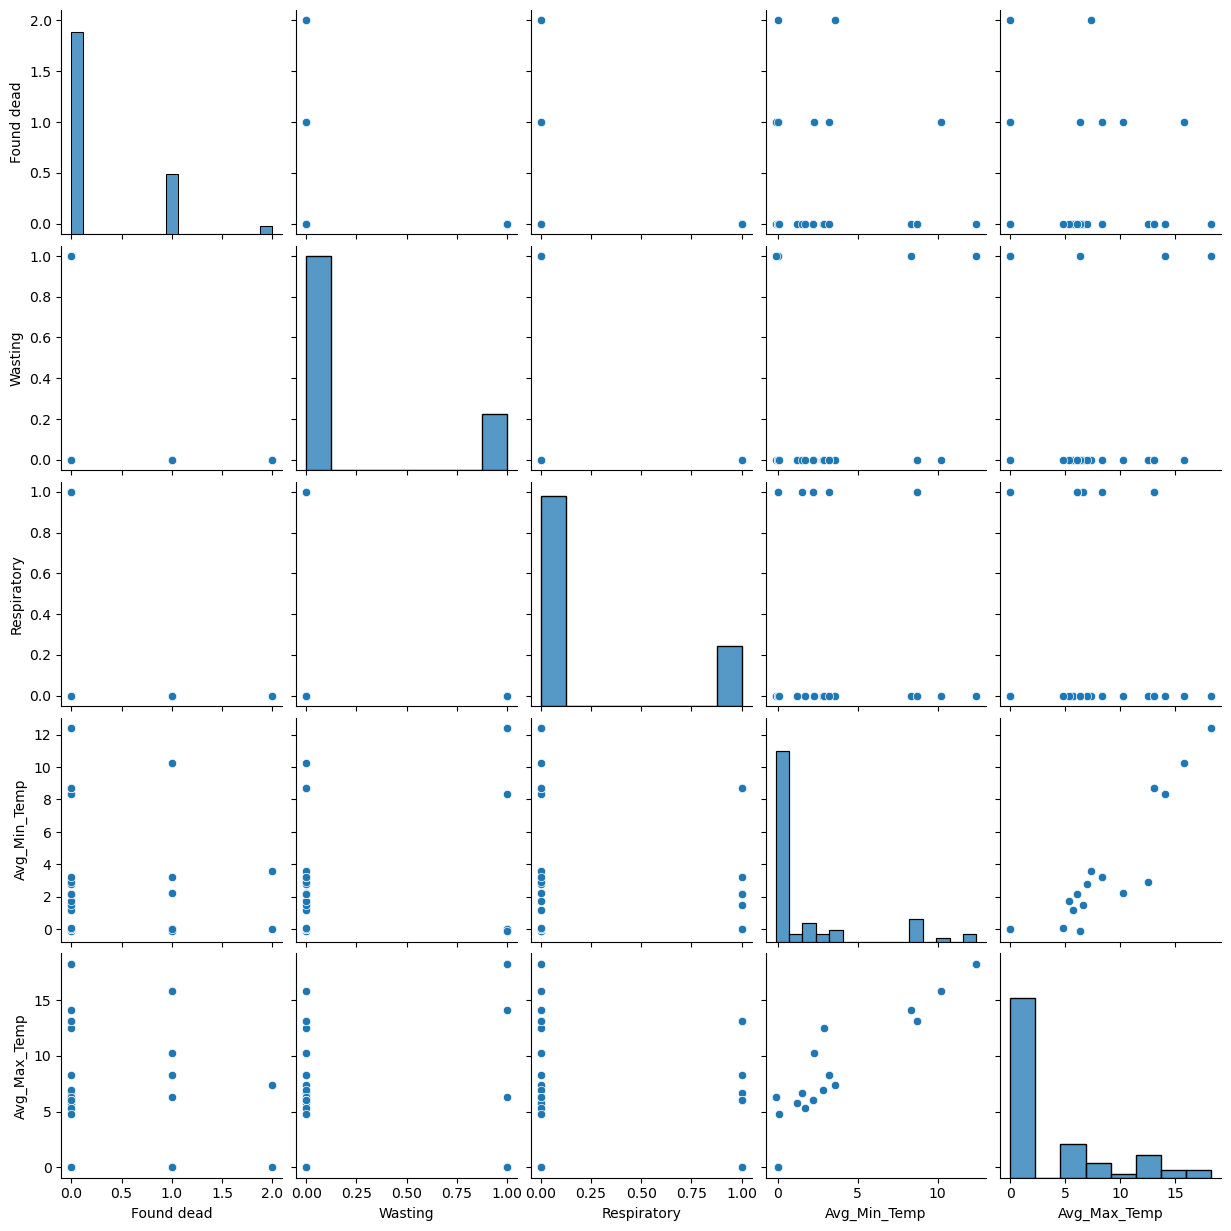

In [36]:
# Pairplot of selected variables
selected_features = ['Found dead', 'Wasting', 'Respiratory', 'Avg_Min_Temp', 'Avg_Max_Temp']
sns.pairplot(df[selected_features])
plt.show()

# Regression Modeling


In [54]:
# Define target and features
target = 'Found dead'
features = df.drop(columns=[target]).columns

X = df[features]
y = df[target]


# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)



In [39]:
# Show coefficients
coefficients = pd.Series(lr.coef_, index=features)
print("Model Coefficients:\n", coefficients)

Model Coefficients:
 Year                              -3.206592e-02
Month                              2.598916e-02
Wasting                           -9.623342e-01
Respiratory                       -1.008335e+00
Other/Unknown                     -1.296845e+00
Abnormal faeces or other GIT      -9.759089e-01
Non-specific                      -8.836363e-01
Nervous                           -9.627999e-01
Musculoskeletal/lameness           2.775558e-17
Recumbent                          3.330669e-16
Egg Quality                        3.533613e-01
skin                              -1.249001e-16
Avg_Min_Temp                      -1.900392e-02
Avg_Max_Temp                       1.598478e-02
diagnosis_label                    2.105100e-03
Age Category_Adult                 2.402163e-02
Age Category_Immature             -4.931700e-01
Age Category_unknown/other        -2.461672e-01
Region_east of england            -5.487046e-02
Region_london                      4.164932e-02
Region_north west  

# Model Evaluation and Discussion


In [43]:
# Evaluation Metrics
rmse = root_mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R² Score: {r2:.3f}")

# Statistical test: Compare true vs predicted
t_stat, p_val = ttest_ind(y_test, y_pred)
print("\nT-test Results:")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}")


Model Performance:
RMSE: 0.598
MAE: 0.427
R² Score: -0.610

T-test Results:
T-statistic: -1.118, P-value: 0.273
